# Labolatorium 6 - Równania nieliniowe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

## Funkcje testowe

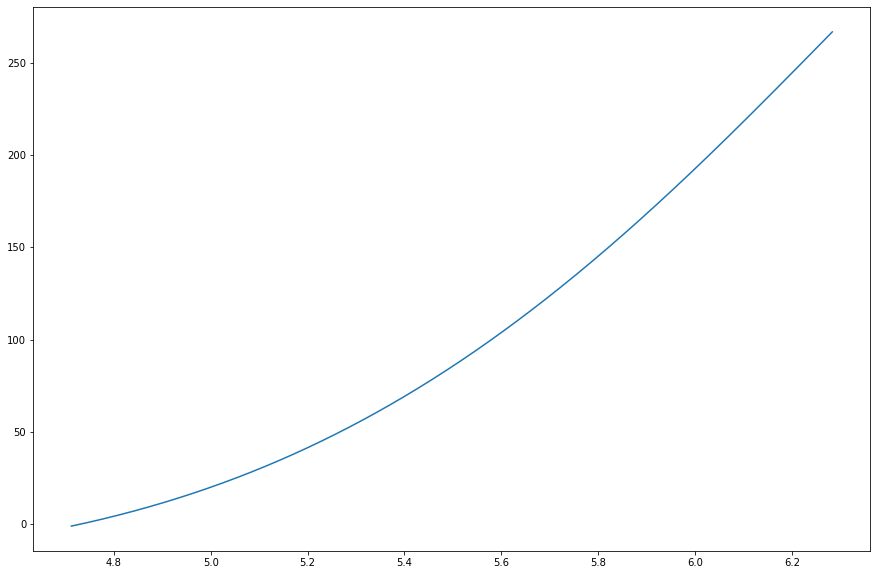

In [2]:
f1 = lambda x : mp.cos(x) * mp.cosh(x) - 1 #[3/2 pi, 2 pi]
f1_prim = lambda x: mp.cos(x) * mp.sinh(x) - mp.sin(x) * mp.cosh(x)

f1_np = lambda x : np.cos(x) * np.cosh(x) - 1 #[3/2 pi, 2 pi]
f1_range = (np.pi * 3/2, np.pi * 2)
f1_X = np.linspace(f1_range[0], f1_range[1], 10000)
f1_Y = f1_np(f1_X)
plt.figure (figsize=(15, 10))
plt.plot(f1_X, f1_Y)
plt.show()

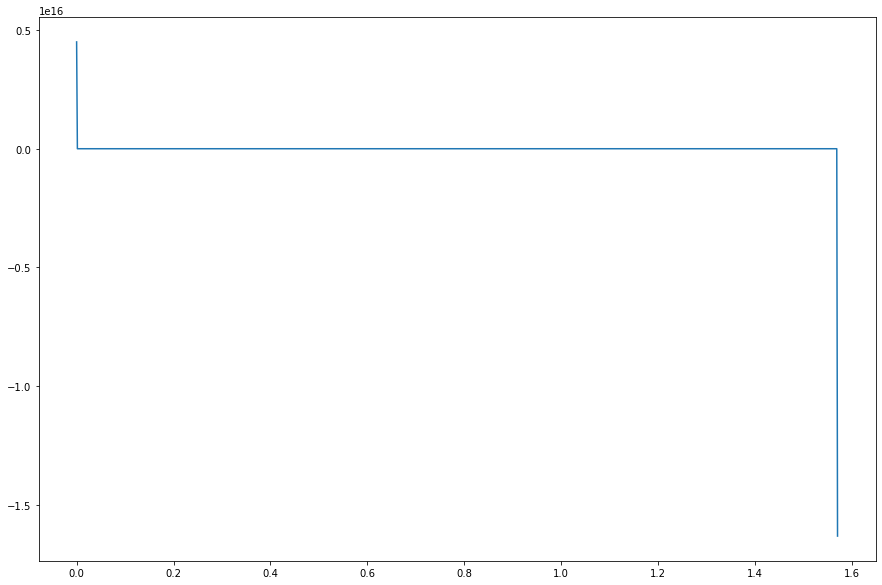

In [3]:
f2 = lambda x : (1 / x) - mp.tan(x) #[0, 1/2 pi]
f2_prim = lambda x : -1/(x **2) - 1 - (mp.tan(x)) **2

f2_np = lambda x : (1 / x) - np.tan(x) #[0, 1/2 pi]
f2_range = (np.finfo(float).eps, np.pi * 0.5)
f2_X = np.linspace(f2_range[0], f2_range[1], 1000)
f2_Y = f2_np(f2_X)
plt.figure (figsize=(15, 10))
plt.plot(f2_X, f2_Y)
plt.show()

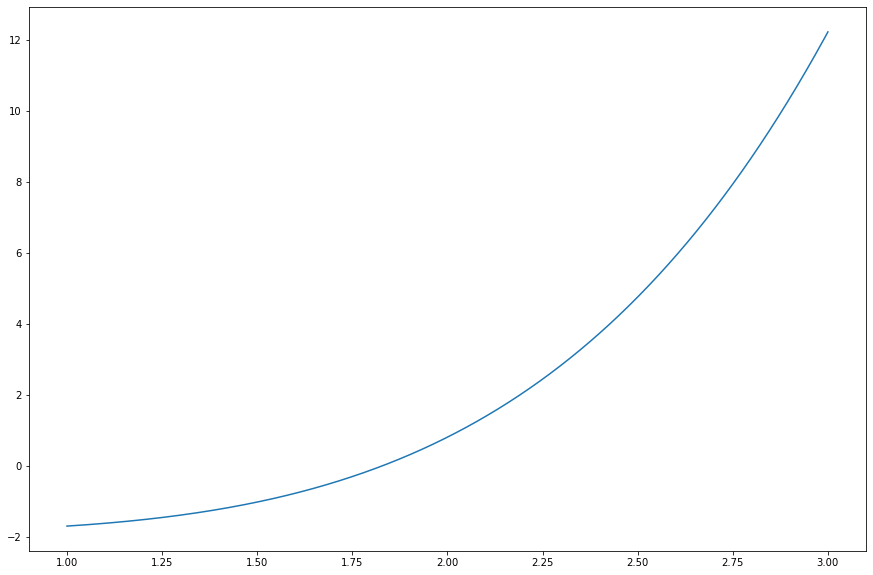

In [4]:
f3 = lambda x : 2**(-x) + mp.exp(x) + 2*mp.cos(x) - 6 #[1, 3]
f3_prim = lambda x : -mp.log(2) * 2**(-x) + mp.exp(x) - 2*mp.sin(x)

f3_np = lambda x : 2**(-x) + np.exp(x) + 2*np.cos(x) - 6 #[1, 3]
f3_range = (1, 3)
f3_X = np.linspace(f3_range[0], f3_range[1], 1000)
f3_Y = f3_np(f3_X)
plt.figure (figsize=(15, 10))
plt.plot(f3_X, f3_Y)
plt.show()

## Metoda bisekcji

In [15]:
def bisection_method (function, precision, a, b, epsilon):
    mp.dps = precision
    a = mp.mpf (a)
    b = mp.mpf (b)
    if mp.sign(function(a)) == mp.sign(function(b)):
        print ("Podano nieodpowiednie krańce przedziału dla zadanej metody")
        exit ()
    i = 0
    while (b - a) > epsilon && i < 100:
        i += 1
        c = a + (b - a) / 2
        if mp.sign(function(a)) == mp.sign(function(c)):
            a = c
        else:
            b = c
    
    return a + (b - a) / 2, i

In [16]:
def number_of_iteration (a, b, epsilon):
    mp.dps = 40
    return mp.ceil(mp.log((mp.mpf(b)-mp.mpf(a))/mp.mpf(epsilon), b = 2))

In [17]:
precision = 50
print ("Metoda bisekcji dla precyzji", precision)

epsilon = 10**-7
val, iteration = bisection_method(f1, precision, *f1_range, epsilon)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f2, precision, *f2_range, epsilon)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f3, precision, *f3_range, epsilon)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-15
val, iteration = bisection_method(f1, precision, *f1_range, epsilon)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f2, precision, *f2_range, epsilon)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f3, precision, *f3_range, epsilon)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-33
val, iteration = bisection_method(f1, precision, *f1_range, epsilon)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f2, precision, *f2_range, epsilon)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = bisection_method(f3, precision, *f3_range, epsilon)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")


Metoda bisekcji dla precyzji 50
Funkcja 1: miejsce zerowe 4.7300407605893306364914079922801785210717540053338 dla epsilon o wartości 1e-07 osiągnięto po 24 iteracjach
Funkcja 2: miejsce zerowe 0.86033360238212302338060690535834836197015551562117 dla epsilon o wartości 1e-07 osiągnięto po 24 iteracjach
Funkcja 3: miejsce zerowe 1.8293835818767547607421875 dla epsilon o wartości 1e-07 osiągnięto po 25 iteracjach
Funkcja 1: miejsce zerowe 4.7300407448627042284611387978582263480764181146672 dla epsilon o wartości 1e-15 osiągnięto po 51 iteracjach
Funkcja 2: miejsce zerowe 0.86033358901937995781210092925202510276565541741433 dla epsilon o wartości 1e-15 osiągnięto po 51 iteracjach
Funkcja 3: miejsce zerowe 1.8293836019338489684571413818048313260078430175781 dla epsilon o wartości 1e-15 osiągnięto po 51 iteracjach
Funkcja 1: miejsce zerowe 4.7300407448627040260240481008338846488015465792144 dla epsilon o wartości 1e-33 osiągnięto po 111 iteracjach
Funkcja 2: miejsce zerowe 0.8603335890193797

Aby osiągnąć żądaną dokładność algorytm musi wykonać kolejno 24, 51, 111 iteracji dla kolejnych epsilonów. Wartości te są zgodne ze wzorem podanym w konspekcie (testy nie umieszczone w sprawozdaniu z uwagi na zaciemnienie obrazu). Liczba iteracji nie różni się pomiędzy zadanymi funkcjami (wyjątek f3 dla pierwszego epsilonu), wynika to z faktu, że przedziały są podobnej długości.

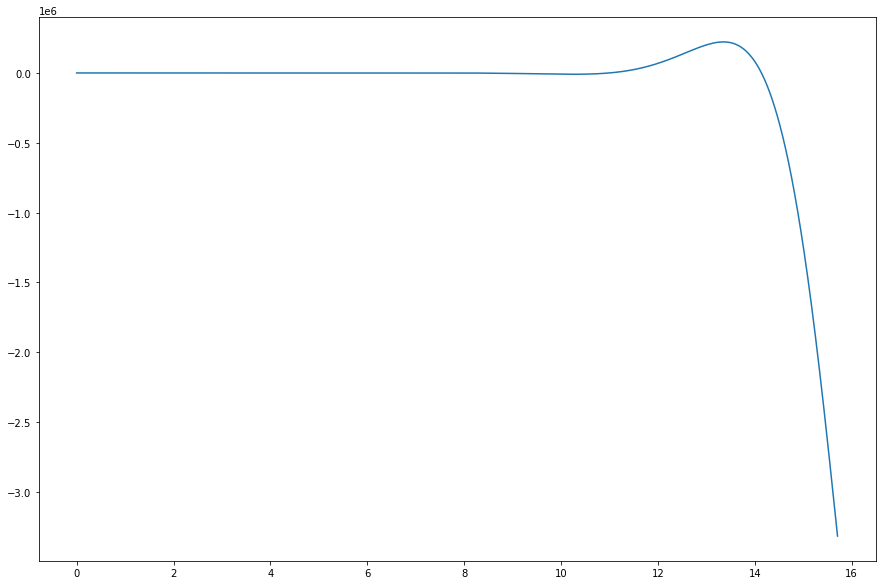

In [42]:
f1_np = lambda x : np.cos(x) * np.cosh(x) - 1
f1_range = (0, np.pi * 5)
f1_X = np.linspace(f1_range[0], f1_range[1], 10000)
f1_Y = f1_np(f1_X)
plt.figure (figsize=(15, 10))
plt.plot(f1_X, f1_Y)
plt.show()

Poszukiwanie k pierwszych dodatnich pierwiastków:

Lewym końcem przedziału będzie 0 + epsilon, należy znaleźć punkt dotani w którym wartość funkcji ma inny znak niż w 0 + epsilon, robimy to wybierając losowo punkty zwiększając o jakiś krok nasz lewy przedział. Gdy taki znajdziemy szukamy metodą bisekcji pierwiastka. Następnie szukamy czy w przedziale od 0+epsilon do miejsca gdzie leży pierwiastek istnieje jakiś. Możemy to zrobić spoglądając na wykres lub przechodząc o jakis odstep w tym przedziale, jeśli znajdziemy dwa punkty, w których funkcja przyjmuje inny znak możemy wykorzystać metodę bisekcji, jeśli nie ma przesuwamy lewy przedział do miejsca zerowego itd.

## Metoda Newtona

In [28]:
def newton_method (function, function_prim, precision, a, b, epsilon, N):
    mp.dps = precision
    x0 = mp.mpf (np.random.uniform (a, b))
    #x0 = mp.mpf (b)
    for i in range (N):
        q = function (x0) / function_prim (x0)
        x0 = x0 - q
        if abs(q) < epsilon:
            N = i
            break
    return x0, N

In [29]:
precision = 50
N = 100
print ("Metoda Newtona dla precyzji", precision)

epsilon = 10**-7
val, iteration = newton_method(f1, f1_prim, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f2, f2_prim, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f3, f3_prim, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-15
val, iteration = newton_method(f1, f1_prim, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f2, f2_prim, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f3, f3_prim, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-33
val, iteration = newton_method(f1, f1_prim, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f2, f2_prim, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = newton_method(f3, f3_prim, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")


Metoda Newtona dla precyzji 50
Funkcja 1: miejsce zerowe 4.7300407448627040282364835098299891577774007102114 dla epsilon o wartości 1e-07 osiągnięto po 1 iteracjach
Funkcja 2: miejsce zerowe 0.86033358901938066722264027143404624979130146938293 dla epsilon o wartości 1e-07 osiągnięto po 3 iteracjach
Funkcja 3: miejsce zerowe 1.8293836019338488179276806360919835751977707513659 dla epsilon o wartości 1e-07 osiągnięto po 4 iteracjach
Funkcja 1: miejsce zerowe 4.7300407448627040260240481008338848198983418076538 dla epsilon o wartości 1e-15 osiągnięto po 5 iteracjach
Funkcja 2: miejsce zerowe 0.86033358901937976248389342413766233341188436323765 dla epsilon o wartości 1e-15 osiągnięto po 4 iteracjach
Funkcja 3: miejsce zerowe 1.8293836019338488171362129468141507925243361267134 dla epsilon o wartości 1e-15 osiągnięto po 6 iteracjach
Funkcja 1: miejsce zerowe 4.7300407448627040260240481008338848198983418007068 dla epsilon o wartości 1e-33 osiągnięto po 7 iteracjach
Funkcja 2: miejsce zerowe 0.8

Metoda Newtona jest znacznie szybsza od metody bisekcji. Dla kolejnych epsilonów potrzebuje ok. 5, 6, 8 iteracji. Liczby te też są zależne od wyboru x0. Zdecydowałem się na losowy wybór x0 z zadanego przedziału. Zauważyłem, że dla drugiej funkcji przy niekorzystnym x0 liczba iteracji wzrasta szcególnie dla epsilon 10**-33.

## Metoda siecznych

In [30]:
def secant_method (function, precision, a, b, epsilon, N):
    mp.dps = precision
    x0 = mp.mpf (np.random.uniform (a, b))
    x1 = mp.mpf (np.random.uniform (a, b))
    #x0 = a
    #x1 = b
    f0 = function (x0)
    f1 = function (x1)
    for i in range (N):
        q = (x1 - x0) / (f1 - f0)
        q *= f1
        x1, x0 = x1 - q, x1
        f0 = f1
        f1 = function (x1)
        if abs(q) < epsilon:
            N = i
            break
    return x0, N

In [33]:
precision = 50
N = 100
print ("Metoda siecznych dla precyzji", precision)

epsilon = 10**-7
val, iteration = secant_method(f1, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f2, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f3, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-15
val, iteration = secant_method(f1, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f2, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f3, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")

epsilon = 10**-33
val, iteration = secant_method(f1, precision, *f1_range, epsilon, N)
print ("Funkcja 1: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f2, precision, *f2_range, epsilon, N)
print ("Funkcja 2: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")
val, iteration = secant_method(f3, precision, *f3_range, epsilon, N)
print ("Funkcja 3: miejsce zerowe", val, "dla epsilon o wartości", epsilon, "osiągnięto po", iteration, "iteracjach")


Metoda siecznych dla precyzji 50
Funkcja 1: miejsce zerowe 4.7300407475531085276496325659007160950835338900526 dla epsilon o wartości 1e-07 osiągnięto po 7 iteracjach
Funkcja 2: miejsce zerowe 0.86033367836021685831520226967881215001135281681025 dla epsilon o wartości 1e-07 osiągnięto po 5 iteracjach
Funkcja 3: miejsce zerowe 1.8293836027982961590061103953370854259853167808996 dla epsilon o wartości 1e-07 osiągnięto po 7 iteracjach
Funkcja 1: miejsce zerowe 4.7300407448627040591212706097497096114844712410383 dla epsilon o wartości 1e-15 osiągnięto po 5 iteracjach
Funkcja 2: miejsce zerowe 0.86033358901937977071655601551967141667064897047898 dla epsilon o wartości 1e-15 osiągnięto po 8 iteracjach
Funkcja 3: miejsce zerowe 1.8293836019338488171847236369130472285919194750387 dla epsilon o wartości 1e-15 osiągnięto po 7 iteracjach
Funkcja 1: miejsce zerowe 4.730040744862704026024048100833884819898344508541 dla epsilon o wartości 1e-33 osiągnięto po 9 iteracjach
Funkcja 2: miejsce zerowe 0.

Jako punkty początkowe wybieram losowa dwa punkty z przedziału. Liczba iteracji jest nieznacznie większa od metody Newtona. W metodzie siecznej liczba iteracji dla kolejnych epsilon wynosi ok. 6, 7, 8.

Porównanie zbieżności metod:

bisekcja * Newton * sieczne

 24     *    3    *   6
 
 51     *    6    *   7
 
 111    *    8    *   8

Możemy zauważyć, że metoda Newtona jest najszybsza jednakże potrzebujemy znać pochodne funkcji w której szukamy miejsca zerowego. Metoda bisekcji jest gorsza o kilka iteracji, jednakże jej atutem jest brak konieczności znania pochodnych. W tej metodzie pochodna jest przybliżana przez iloraz różnicowy.